<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

## **Lab 2: *Statistics & Data Visualization***

### **Tenggat Waktu: 16 September 2023, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab2_1806205773_Abdurrafi Arief.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 16 September 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Fahira Adindiah"
KELAS = "C"
NPM = "2106751575"

# Isi dengan NPM teman yang berdiskusi dengan Anda  
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Fahira Adindiah dari kelas C dengan NPM 2106751575, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Fahira Adindiah)


# Exploratory Data Analysis

*Exploratory Data Analysis* (EDA) adalah suatu proses dalam melakukan analisis terhadap dataset dengan tujuan untuk melihat karakteristik utama dari data tersebut. EDA merupakan pemrosesan dasar yang hasilnya dapat mempengaruhi keputusan-keputusan yang diambil oleh seorang data scientist dalam melakukan pemrosesan data di tahap selanjutnya. Pada proses ini sering melibatkan dua hal yang akan kita pelajari pada Lab kali ini, yaitu *descriptive statistics* dan data *visualization*.

## Deskripsi Dataset Smartphone Specification

Dataset yang digunakan pada Lab kali ini merepresentasikan data spesifikasi dari *smartphone* yang beredar pada pasar saat ini. Berikut merupakan deskripsi dari setiap kolom yang ada pada dataset tersebut

* `Brand` : Nama Merk/Brand *smartphone*
* `Phone` : Nama Tipe/Model *smartphone*
* `Price` : Harga *smartphone*
* `Screensize (inches)` : Ukuran layar *smartphone* dalam satuan inci
* `Camera_Nos` : Jumlah kamera belakang pada *smartphone*
* `Front Camera (MP)` : Besar Megapixel kamera depan *smartphone*
* `Rear Camera (MP)` :  Besar Megapixel kamera belakang *smartphone*
* `Memory (GB)` : Besar penyimpanan dalam Gigabyte
* `RAM (GB)` : Besar RAM dalam Gigabyte
* `Battery (mAh)` : Besar baterai Smartphone
* `Rating` : Penilaian produk smartphone tersebut

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

In [4]:
df = pd.read_csv('SmartphoneSpecs.csv')

In [5]:
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df.head()

Jumlah data: 910
Jumlah atribut: 11


,Brand,Phone,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
0,Xiaomi,Xiaomi Redmi Note 10,13999,6.43,4,13.0,48.0,64.0,4.0,5000.0,3
1,Vivo,Vivo Y12s,9990,6.51,2,8.0,13.0,32.0,3.0,5000.0,1
2,Samsung,Samsung Galaxy M31s,15999,6.50,4,32.0,64.0,128.0,6.0,6000.0,2
3,Vivo,Vivo Y20,12990,6.51,3,8.0,13.0,64.0,4.0,5000.0,2
4,Realme,Realme 7i,13999,6.50,4,16.0,64.0,128.0,8.0,5000.0,3


In [6]:
# Menghitung jumlah data missing value per atribut
col_na = df.isnull().sum().sort_values(ascending=False)
percent = col_na / len(df)

missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data['Total'] > 0])

                     Total   Percent
Memory (GB)             29  0.031868
RAM (GB)                23  0.025275
Screensize (inches)     12  0.013187
Battery (mAh)            9  0.009890
Front Camera (MP)        8  0.008791
Rear Camera (MP)         3  0.003297


Karena terdapat missing value pada data tersebut dengan jumlah yang relatif kecil dengan nilai terbesar 0.032% saja. Maka dari itu, untuk saat ini kita akan menghapus baris data yang memiliki missing value tersebut. Untuk proses *pre-processing data* akan kalian pelajari secara lebih lanjut pada Lab selanjutnya.

In [7]:
# Hapus baris yang memiliki missing value
df.dropna(inplace=True)

In [8]:
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df.head()

Jumlah data: 848
Jumlah atribut: 11


,Brand,Phone,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
0,Xiaomi,Xiaomi Redmi Note 10,13999,6.43,4,13.0,48.0,64.0,4.0,5000.0,3
1,Vivo,Vivo Y12s,9990,6.51,2,8.0,13.0,32.0,3.0,5000.0,1
2,Samsung,Samsung Galaxy M31s,15999,6.50,4,32.0,64.0,128.0,6.0,6000.0,2
3,Vivo,Vivo Y20,12990,6.51,3,8.0,13.0,64.0,4.0,5000.0,2
4,Realme,Realme 7i,13999,6.50,4,16.0,64.0,128.0,8.0,5000.0,3


Dapat terlihat bahwa jumlah data telah berkurang dari yang sebelumnya berjumlah 910 data menjadi 848 data. Data yang dikurangi tersebut merupakan data yang memiliki missing value. Maka dari itu, tidak ada lagi data yang memiliki missing value yang dapat terlihat pada hasil perintah berikut

Pada Pandas, terdapat metode `.info()` yang berguna untuk mendapatkan ringkasan informasi dari DataFrame, termasuk nama-nama kolom, jumlah data yang tidak null (non-null), dan tipe data untuk setiap kolom. Penggunaan metode ini membantu kita dengan cepat memahami struktur DataFrame yang sedang kita kerjakan.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 848 entries, 0 to 909
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                848 non-null    object 
 1   Phone                848 non-null    object 
 2   Price                848 non-null    int64  
 3   Screensize (inches)  848 non-null    float64
 4   Camera_Nos           848 non-null    int64  
 5   Front Camera (MP)    848 non-null    float64
 6   Rear Camera (MP)     848 non-null    float64
 7   Memory (GB)          848 non-null    float64
 8   RAM (GB)             848 non-null    float64
 9   Battery (mAh)        848 non-null    float64
 10  Rating               848 non-null    int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 79.5+ KB


Selain itu, terdapat juga metode .describe() yang berguna untuk menghasilkan statistik deskriptif dari suatu DataFrame. Melalui metode ini, kita bisa memperoleh ringkasan statistik yang cukup menggambarkan terkait central tendency, persebaran data, dan bentuk distribusi dari kumpulan data tersebut.

In [10]:
df.describe()

,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,22500.871462,6.045649,2.301887,13.798349,25.679245,92.830189,4.752358,3888.193396,1.396226
std,20643.214336,0.606627,1.116960,9.044017,21.453267,87.672189,2.477048,938.662621,0.611642
min,905.000000,2.450000,1.000000,1.200000,5.000000,8.000000,1.000000,950.000000,1.000000
25%,9598.500000,5.500000,1.000000,8.000000,12.000000,32.000000,3.000000,3100.000000,1.000000
50%,14999.000000,6.260000,2.000000,12.000000,13.000000,64.000000,4.000000,4000.000000,1.000000
75%,27992.250000,6.500000,3.000000,16.000000,48.000000,128.000000,6.000000,4500.000000,2.000000
max,173999.000000,7.600000,5.000000,48.000000,108.000000,512.000000,12.000000,7000.000000,3.000000


# Descriptive Statistics
Ada banyak jenis measures yang dapat diterapkan untuk *descriptive statistics*.

Mari kita mengingat kembali materi yang terdapat pada Mata Kuliah StatProb, diantaranya sebagai berikut:
1. *Central tendency* (mean, median, mode)
2. *Dispersion* atau *variability* (variance, standard deviation)
3. Minimum, maximum
4. Range
5. Quantile
6. Percentile

**Central tendency sering dipakai untuk melihat distribusi data.**
Pada biasanya, `mean` lebih cocok untuk distribusi normal (yang terlihat simetris di tengah), sementara `median` lebih baik untuk distribusi bersifat *skewed* (berat sebelah). Tentunya, ini tidak berlaku untuk data kategorik yang hanya bisa menggunakan `mode`.

Terkadang central tendency saja tidak cukup untuk melihat distribusi data. Central tendency tidak bisa menggambarkan seberapa besar data tersebar. **Measure of dispersion merupakan ukuran yang biasa digunakan untuk melihat keragaman data atau seberapa besar data tersebar.** Terdapat beberapa ukuran untuk menentukan dispersi data pengamatan, seperti jangkauan/rentang (`range`) dan simpangan baku (`standard deviation`).

Secara umum, berikut adalah contoh penggunaan descriptive statistics (1), (2), (3) dari atribut `Screensize (inches)`:

In [11]:
screensize_arr = df['Screensize (inches)']

stats = [
    ['Mean', np.mean(screensize_arr)],
    ['Median', np.median(screensize_arr)],
    ['Mode', scp.mode(screensize_arr)[0]],
    ['Standard Deviation', np.std(screensize_arr)],
    ['Variance', np.var(screensize_arr)],
    ['Minimum', np.min(screensize_arr)],
    ['Maximum', np.max(screensize_arr)],
]

pd.DataFrame(stats, columns=['Measure', 'Value'])

,Measure,Value
0,Mean,6.045649
1,Median,6.260000
2,Mode,5.500000
3,Standard Deviation,0.606269
4,Variance,0.367562
5,Minimum,2.450000
6,Maximum,7.600000


Pada hasil di atas, bisa kita lihat bahwa nilai terbesar dimiliki oleh Mean dengan urutan sebagai berikut:
`median` > `mean` > `mode`

Data tersebar sebesar 0.61 dari nilai `mean`. dengan nilai maksimum 7.6 dan minimum 2.45. Kemungkinan data cenderung padat di nilai yang tinggi atau padat ke kanan.

/var/folders/wj/zf810q1154vd1msmx_0qkrkw0000gn/T/ipykernel_1306/2712290349.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(screensize_arr, shade=True)


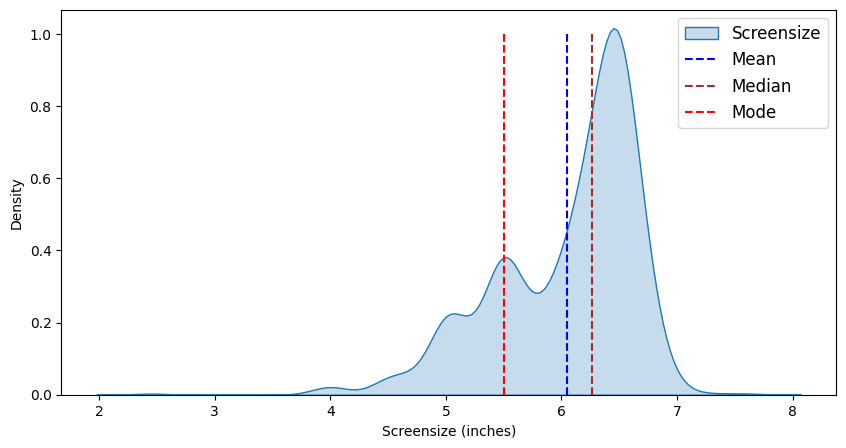

In [12]:
plt.figure(figsize=(10,5))
sns.kdeplot(screensize_arr, shade=True)
plt.vlines(x=np.mean(screensize_arr), ymin=0, ymax=1, color='blue', linestyle='--')
plt.vlines(x=np.median(screensize_arr), ymin=0, ymax=1, color='brown', linestyle='--')
plt.vlines(x=scp.mode(screensize_arr)[0], ymin=0, ymax=1, color='red', linestyle='--')
plt.legend(['Screensize', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Bisa dilihat bahwa distribusi bersifat `left skewed` karena distribusi data lebih berat di sebelah kanan dan memiliki ekor yang panjang di sebelah kiri. Dapat terlihat pula pada visualisasi data di atas, `median`, `mean`, `modus` tidak selalu sama. Pada kasus ini, median dapat menjadi pengukuran yang tepat untuk menggambarkan central tendency dari data karena distribusi data bersifat left skewed.

Untuk membandingkan distribusi data A ke data B, kita dapat menggunakan visualisasi overlapping KDE plot. Sebagai contoh jika kita ingin membandingkan distribusi Screen Size pada Xiaomi dan Samsung, berikut merupakan penerapan KDE plot-nya

/var/folders/wj/zf810q1154vd1msmx_0qkrkw0000gn/T/ipykernel_1306/3491047464.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(xiaomi['Screensize (inches)'], shade=True)
/var/folders/wj/zf810q1154vd1msmx_0qkrkw0000gn/T/ipykernel_1306/3491047464.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(samsung['Screensize (inches)'], shade=True)


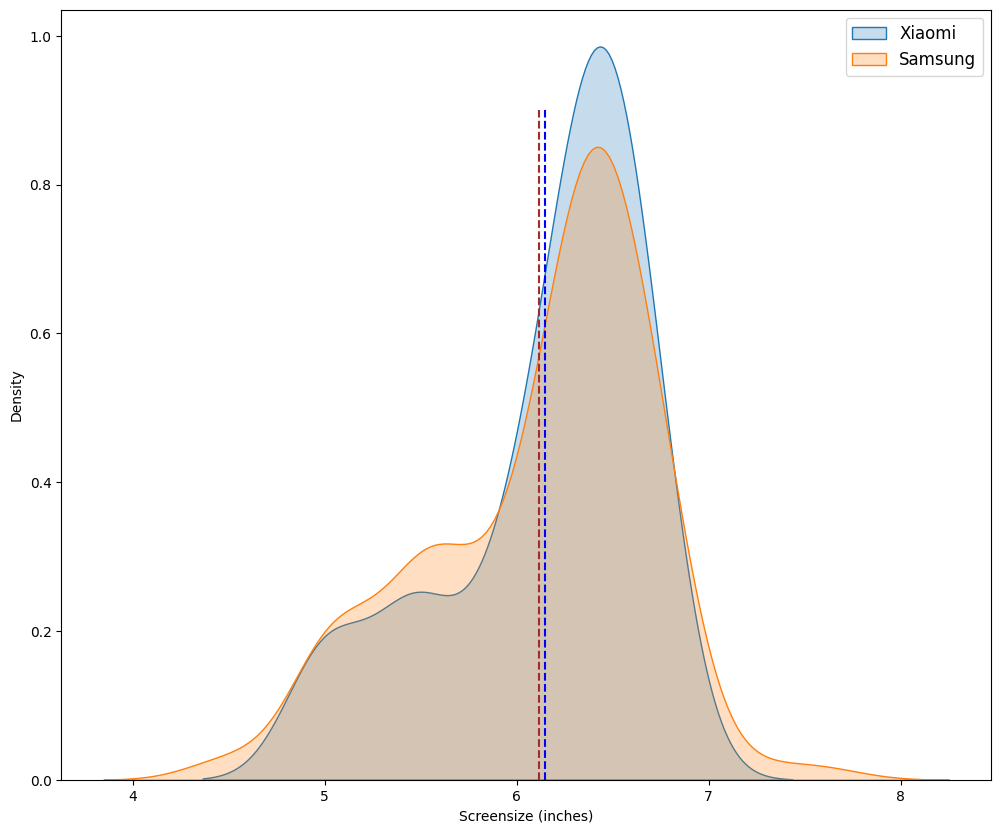

In [13]:
# KDE Plot
xiaomi = df[df['Brand'] == 'Xiaomi']
samsung = df[df['Brand'] == 'Samsung']
plt.figure(figsize=(12,10))
sns.kdeplot(xiaomi['Screensize (inches)'], shade=True)
sns.kdeplot(samsung['Screensize (inches)'], shade=True)
plt.legend(['Xiaomi','Samsung'], fontsize=12)
plt.vlines(x=xiaomi['Screensize (inches)'].mean(), ymin=0, ymax=0.9, color='blue', linestyle='--')
plt.vlines(x=samsung['Screensize (inches)'].mean(), ymin=0, ymax=0.9, color='brown', linestyle='--')
plt.show()

# Correlation

Korelasi dalam ranah *data science* merujuk pada hubungan statistik antara dua atau lebih variabel. Melalui korelasi, membantu kita memahami bagaimana perubahan dalam suatu variabel akan berkaitan dengan perubahan dalam variabel lainnya. Korelasi mengukur sejauh mana dua variabel bergerak bersamaan atau dependensi dalam suatu pola tertentu.

Dalam konteks korelasi, ada dua jenis korelasi yang umum digunakan:

* Korelasi Positif: Ketika dua variabel memiliki korelasi positif, artinya ketika satu variabel naik, yang lainnya juga cenderung naik, dan sebaliknya. Ini mengindikasikan adanya hubungan searah antara kedua variabel tersebut.

* Korelasi Negatif: Jika dua variabel memiliki korelasi negatif, artinya ketika satu variabel naik, yang lainnya cenderung turun, dan sebaliknya. Ini menunjukkan adanya hubungan terbalik atau lawan antara kedua variabel tersebut.

Korelasi dapat diukur dengan menggunakan koefisien korelasi, yang paling umum digunakan adalah dengan menghitung koefisien **korelasi Pearson**. Koefisien ini memiliki nilai antara -1 hingga 1:

* Nilai +1 menunjukkan korelasi positif sempurna, yaitu kedua variabel bergerak searah secara linier.
* Nilai -1 menunjukkan korelasi negatif sempurna, yaitu kedua variabel bergerak terbalik secara linier.
* Nilai 0 menunjukkan tidak ada korelasi linier antara kedua variabel tersebut.


Korelasi adalah alat penting dalam analisis data, karena membantu kita mengidentifikasi hubungan antara variabel, memprediksi perilaku data atau variabel, dan membuat keputusan yang lebih baik berdasarkan pemahaman tentang bagaimana variabel-variabel tersebut berkaitan antar satu sama lainnya. Namun, penting untuk diingat bahwa korelasi tidak selalu menunjukkan hubungan sebab-akibat, dan perlu berhati-hati dalam mengartikan hasil korelasi.



In [14]:
# Implementasi korelasi Pearson
df.select_dtypes(np.number).corr(method='pearson')

,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
Price,1.000000,0.279743,0.255461,0.276826,0.260423,0.659269,0.591847,0.014406,0.184664
Screensize (inches),0.279743,1.000000,0.725854,0.508298,0.531006,0.427751,0.602524,0.733120,0.389417
Camera_Nos,0.255461,0.725854,1.000000,0.546458,0.669166,0.416711,0.589898,0.632693,0.467579
Front Camera (MP),0.276826,0.508298,0.546458,1.000000,0.620479,0.387675,0.622373,0.331991,0.372598
Rear Camera (MP),0.260423,0.531006,0.669166,0.620479,1.000000,0.369280,0.622262,0.481070,0.522019
Memory (GB),0.659269,0.427751,0.416711,0.387675,0.369280,1.000000,0.709825,0.198526,0.257357
RAM (GB),0.591847,0.602524,0.589898,0.622373,0.622262,0.709825,1.000000,0.383067,0.437329
Battery (mAh),0.014406,0.733120,0.632693,0.331991,0.481070,0.198526,0.383067,1.000000,0.346563
Rating,0.184664,0.389417,0.467579,0.372598,0.522019,0.257357,0.437329,0.346563,1.000000


Dari perhitungan korelasi Pearson di atas, kita bisa menentukan pasangan atribut apa saja yang memiliki relasi yang tinggi. Berdasarkan tabel di atas, pasangan atribut yang memiliki relasi yang tinggi adalah pasangan atribut `Camera_Nos` dengan `Screensize (inches)` dan `Rear Camera (MP)`. Untuk membuktikannya, di bawah ini terdapat 2 scatterplot yang menunjukkan hubungan linear dengan `Camera_Nos`, yaitu:
* `Screensize (inches)`: 0.73
* `Rear Camera (MP)`: 0.67

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

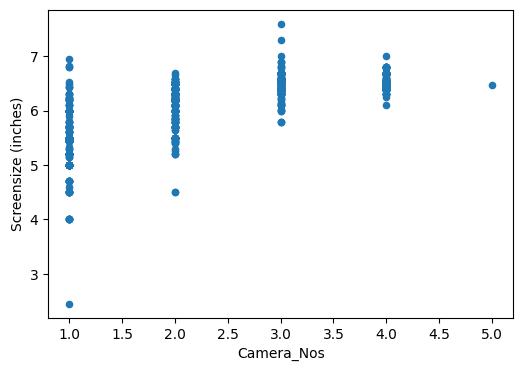

In [15]:
# Scatterplot Camera_Nos dan Screensize (inches)
w = df["Camera_Nos"]
z = df["Screensize (inches)"]
df.plot.scatter(x="Camera_Nos", y="Screensize (inches)", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

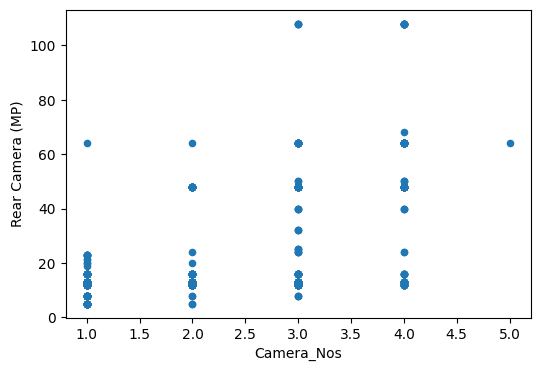

In [ ]:
# Scatterplot Camera_Nos dan Rear Camera (MP)
w = df["Camera_Nos"]
z = df["Rear Camera (MP)"]
df.plot.scatter(x="Camera_Nos", y="Rear Camera (MP)", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

# Data Visualization

<AxesSubplot:xlabel='count', ylabel='Brand'>

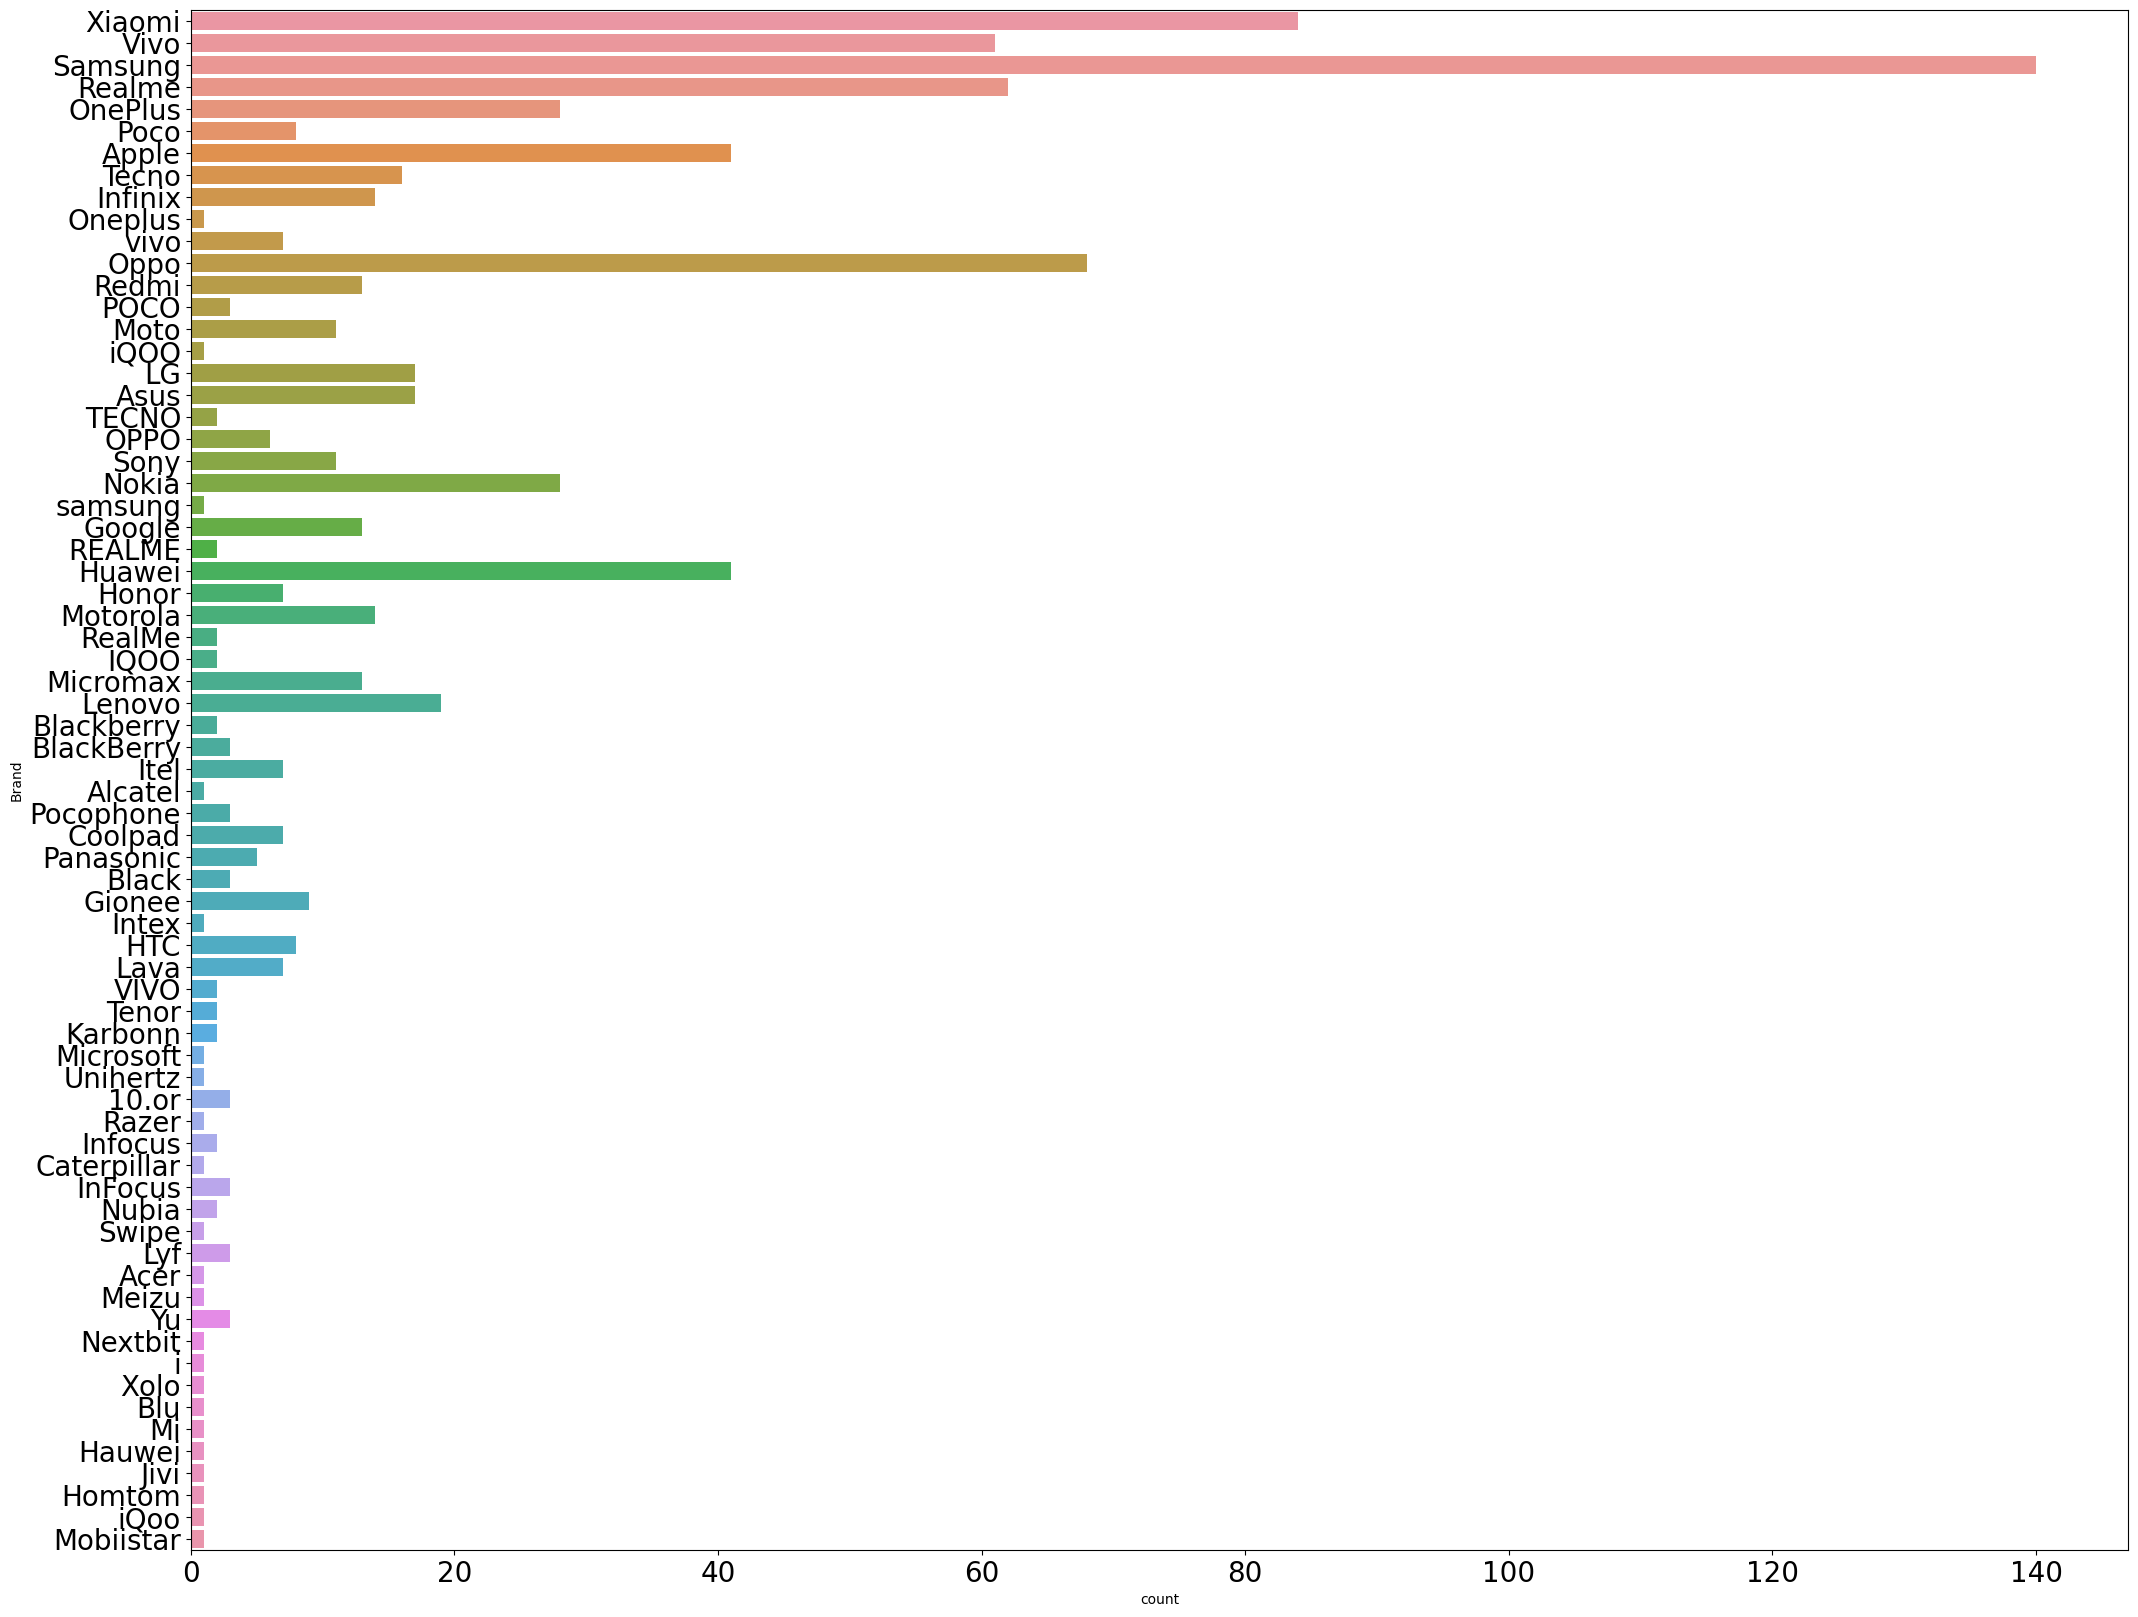

In [16]:
plt.figure(figsize=(25,20))
plt.yticks(size=20)

#to increase x ticks 
plt.xticks(size=20)
# Fungsi yang membuat plot untuk melihat distribusi frekuensi untuk satu kolom/atribut
sns.countplot(y='Brand', data=df)

Bisa kita lihat pada countplot di atas bahwa Samsung merupakan brand smartphone yang memiliki tipe terbanyak. Berikut merupakan contoh jika kita ingin mendapatkan visualisasi data yang telah diurutkan dari yang paling besar hingga terkecil berdasarkan nilai yang dimilikinya.

<AxesSubplot:xlabel='count', ylabel='Brand'>

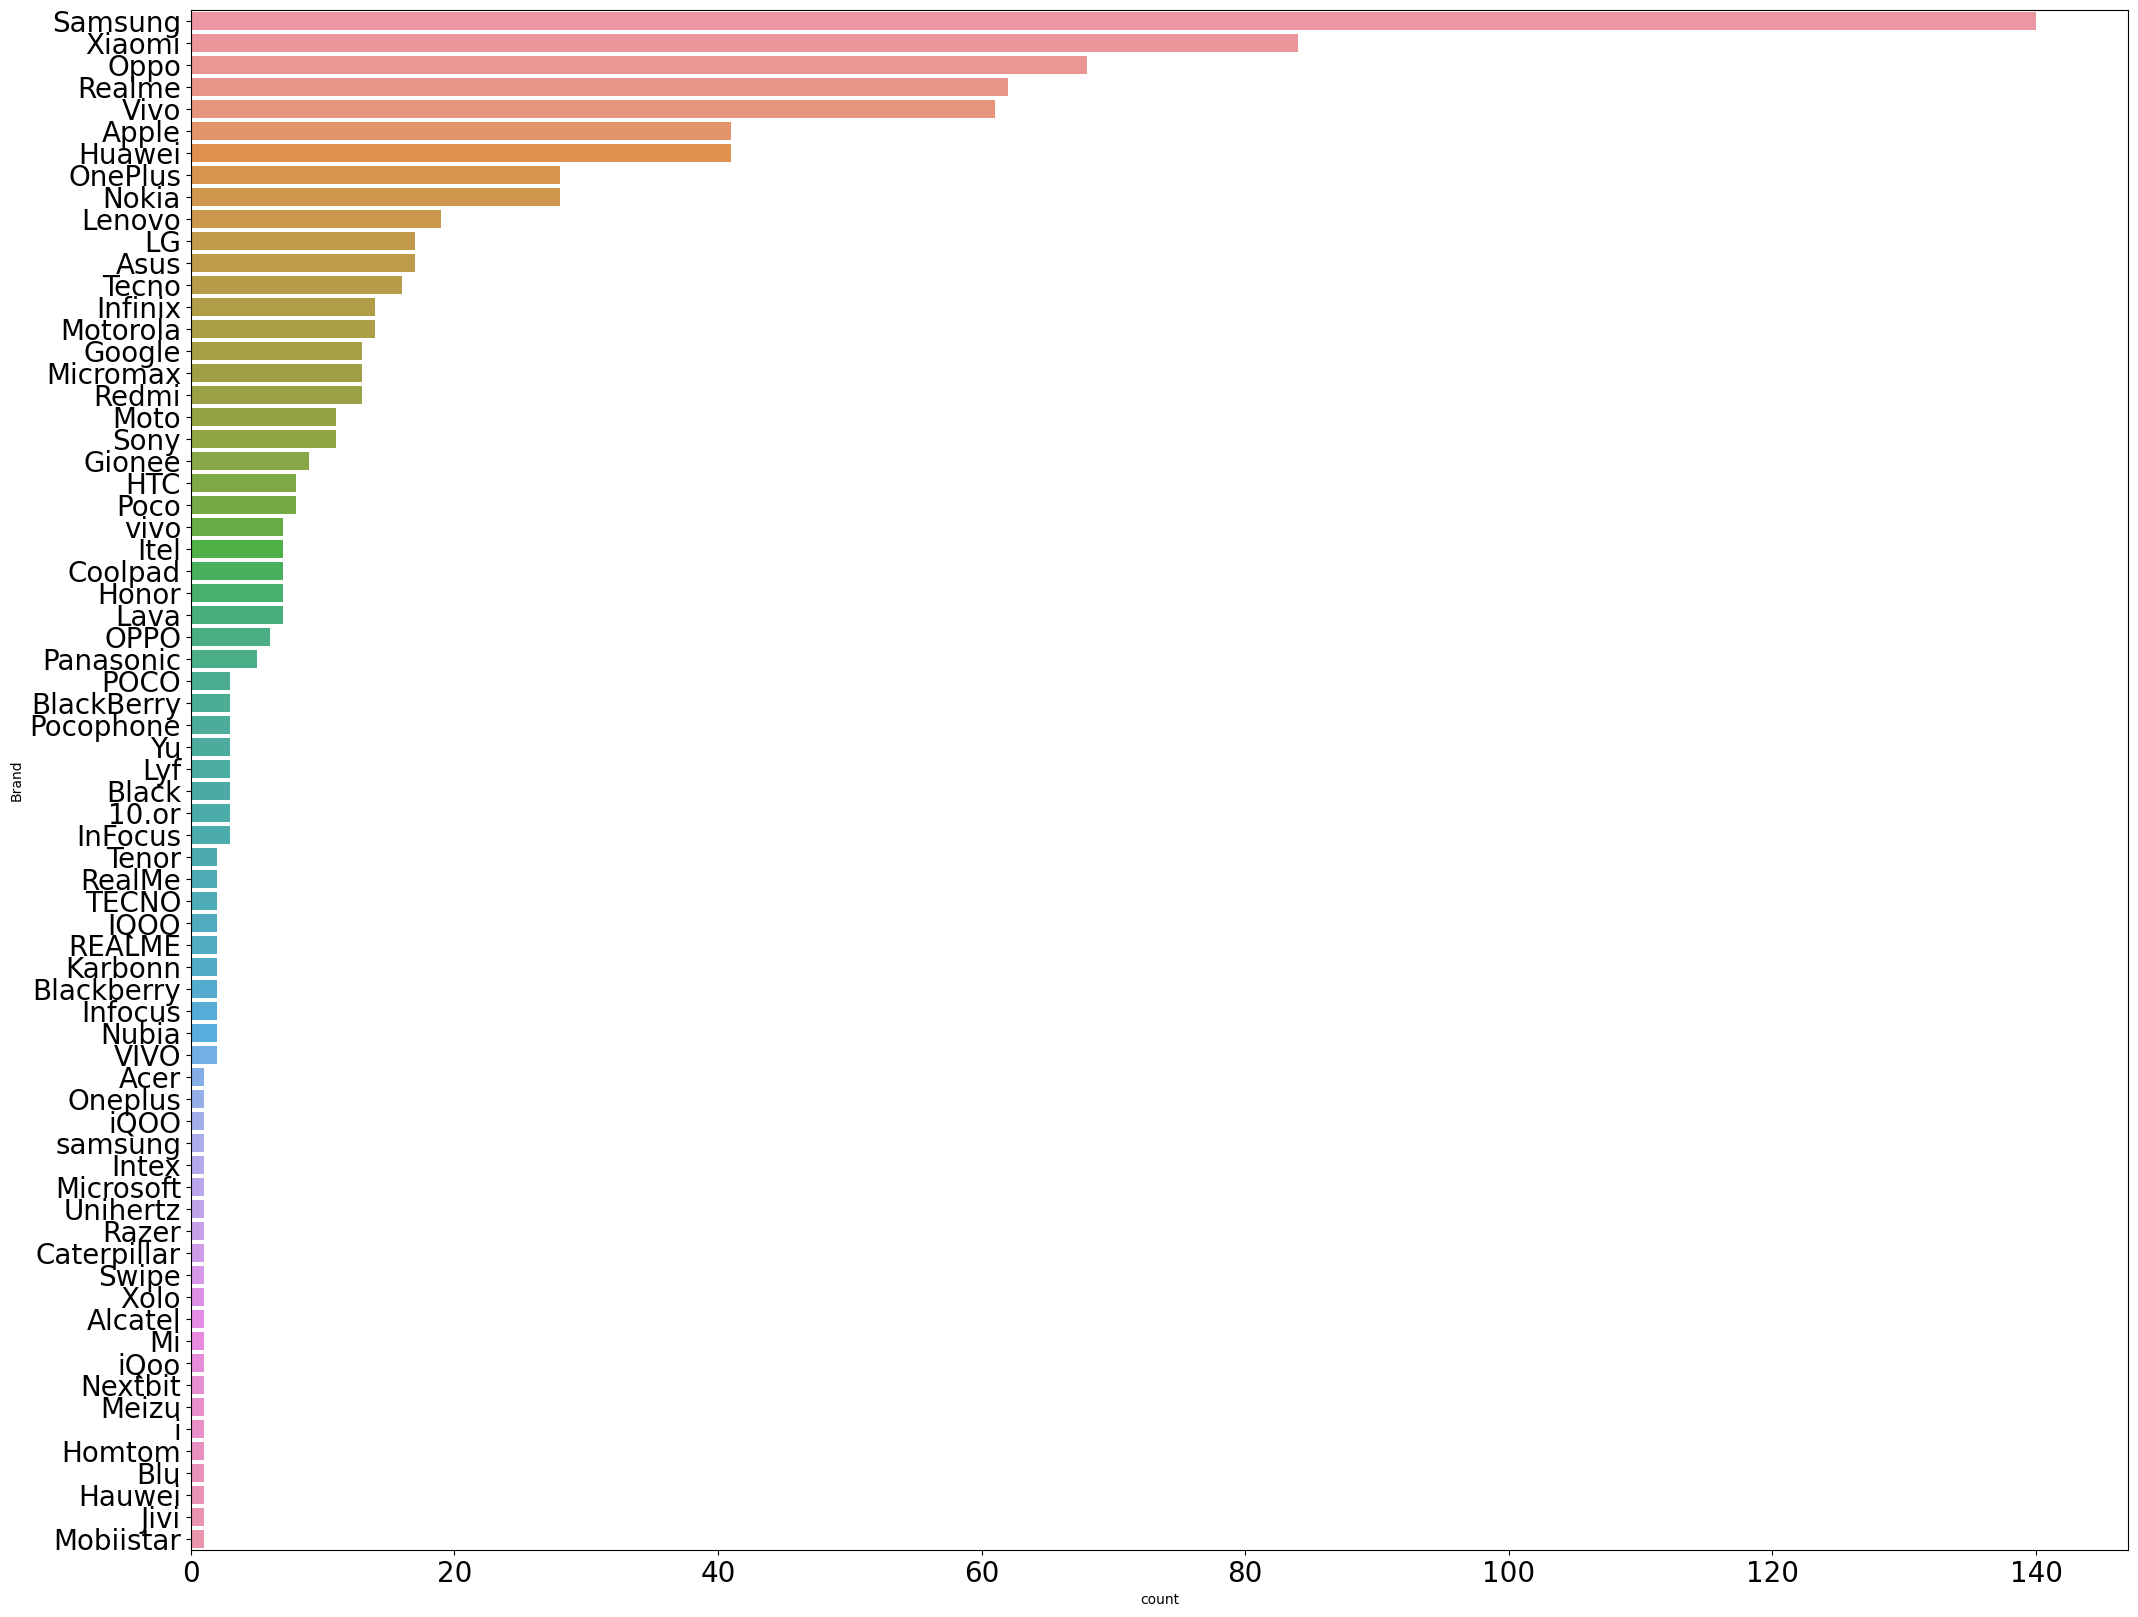

In [17]:
# Calculate the counts of each brand and sort them in descending order
brand_counts = df['Brand'].value_counts().sort_values(ascending=False)

# Create a countplot with sorted order
plt.figure(figsize=(25, 20))
plt.yticks(size=20)
plt.xticks(size=20)
sns.countplot(y='Brand', data=df, order=brand_counts.index)

<AxesSubplot:xlabel='count', ylabel='Memory (GB)'>

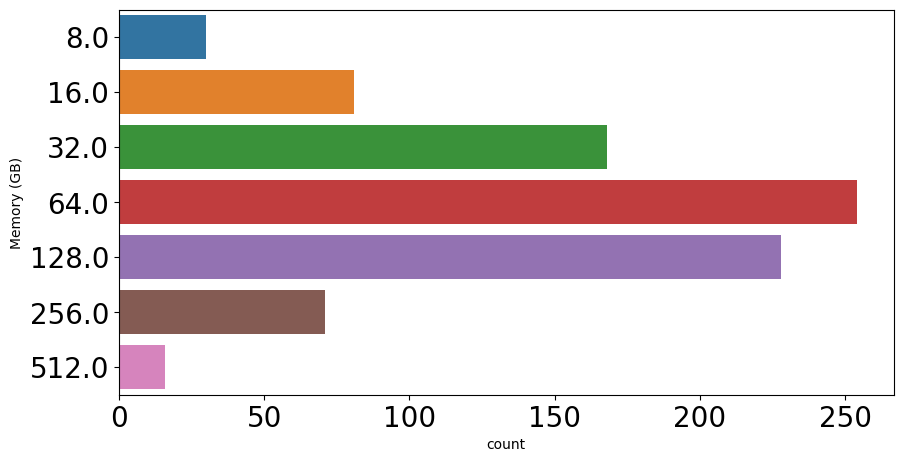

In [ ]:
plt.figure(figsize=(10,5))
plt.yticks(size=20)

#to increase x ticks 
plt.xticks(size=20)
sns.countplot(y='Memory (GB)', data=df)

Dari countplot, dapat terlihat bahwa jumlah penyimpanan *smartphone* paling banyak adalah sebesar 64 GB dan 512 GB jumlah penyimpanan paling sedikit.

<AxesSubplot:xlabel='Brand', ylabel='RAM (GB)'>

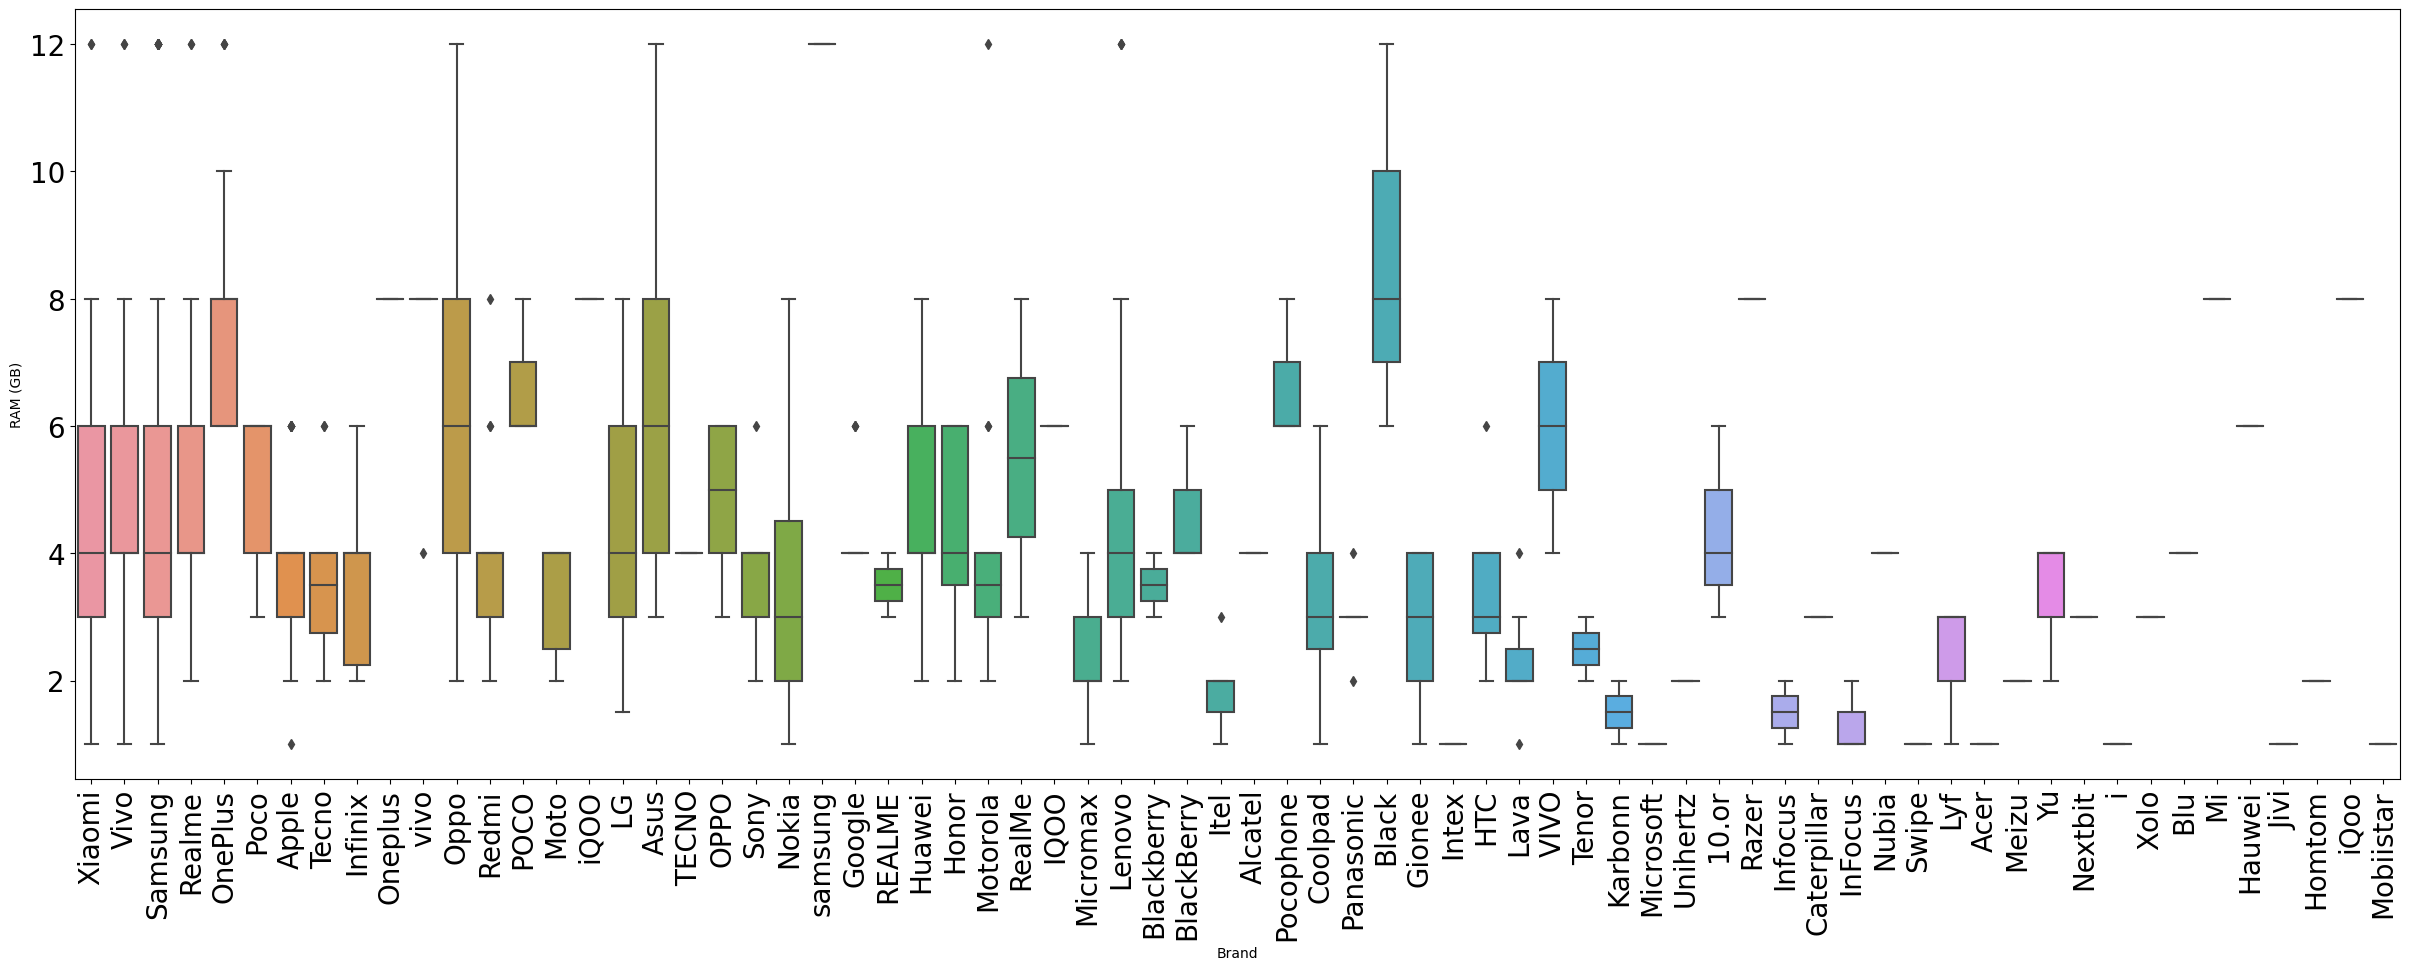

In [18]:
# Menampilkan boxplot Make terhadap RAM (GB)
plt.figure(figsize=(30,10))
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
sns.boxplot(data=df, x='Brand', y='RAM (GB)')

# Latihan Soal

### **SOAL 1: Descriptive Statistics**

(a) Tampilkan descriptive statistics dari atribut <font color='red'>**Memory (GB)**</font>! (hint: harap tambahkan range, Q1, Q2, Q3) ***[revised]***

In [19]:
# Jawab
memory_arr = df['Memory (GB)']

stats = [
    ['Mean', np.mean(memory_arr)],
    ['Median', np.median(memory_arr)],
    ['Mode', scp.mode(memory_arr)[0]],
    ['Standard Deviation', np.std(memory_arr)],
    ['Variance', np.var(memory_arr)],
    ['Minimum', np.min(memory_arr)],
    ['Maximum', np.max(memory_arr)],
    ['Range', ((np.max(memory_arr)) - (np.min(memory_arr)))],
    ['Q1', np.quantile(memory_arr, 0.25)],
    ['Q2', np.quantile(memory_arr, 0.5)],
    ['Q3', np.quantile(memory_arr, 0.75)],    
]

pd.DataFrame(stats, columns=['Measure', 'Value'])

,Measure,Value
0,Mean,92.830189
1,Median,64.000000
2,Mode,64.000000
3,Standard Deviation,87.620480
4,Variance,7677.348523
5,Minimum,8.000000
6,Maximum,512.000000
7,Range,504.000000
8,Q1,32.000000
9,Q2,64.000000


(b) Apa central tendency paling cocok untuk atribut <font color='red'>**Memory (GB)**</font>? Berikan alasan! ***[revised]***

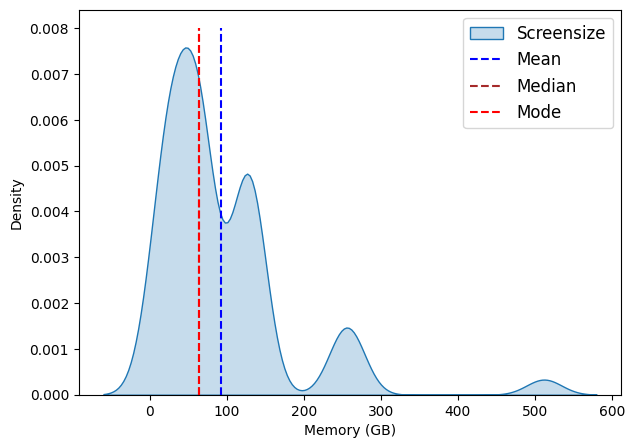

In [20]:
# Jawab
plt.figure(figsize=(7,5))
sns.kdeplot(memory_arr, fill=True)
plt.vlines(x=np.mean(memory_arr), ymin=0, ymax=0.008, color='blue', linestyle='--')
plt.vlines(x=np.median(memory_arr), ymin=0, ymax=0.008, color='brown', linestyle='--')
plt.vlines(x=scp.mode(memory_arr)[0], ymin=0, ymax=0.008, color='red', linestyle='--')
plt.legend(['Screensize', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Terlihat bahwa distribusi KDE plot bersifat right skewed. Oleh karena itu, **median** merupakan central tendency yang paling cocok.

(c) Buatlah heatmap dari korelasi Pearson pada dataset `SmartphoneSpecs.csv` dan berikan analisis Anda terhadap heatmap tersebut!

Text(0.5, 1.0, "Matriks korelasi Pearson 'SmartphoneSpecs.csv'")

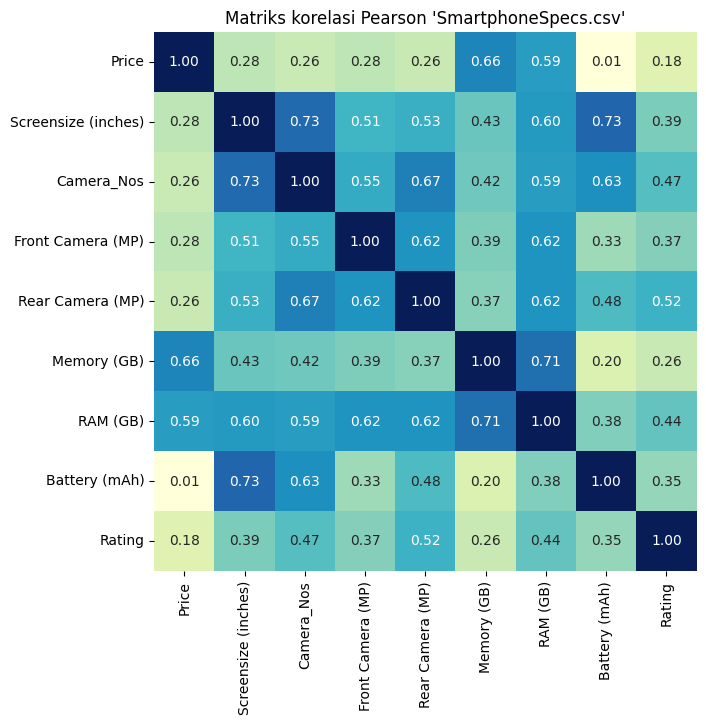

In [21]:
# Jawab
plt.figure(figsize=(7,7))
sns.heatmap(df.select_dtypes(np.number).corr(method="pearson"), 
        annot=True,
        cbar=False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=df.select_dtypes(np.number).columns,
        yticklabels=df.select_dtypes(np.number).columns)
plt.title("Matriks korelasi Pearson 'SmartphoneSpecs.csv'")

Saya menggunakan **heatmap** agar dapat menampilkan nilai korelasi antar variable sebagai color-coded matrix yang mudah dipahami.

Berdasarkan heatmap di atas, dapat disimpulkan pasangan atribut dengan nilai korelasi rendah hingga tinggi.
* Aspek `Screensize (inches)` dan `Battery (mAh)` terlihat berkorelasi positif (kuat)
* Aspek `Screensize (inches)` dan `Price` terlihat berkorelasi positif (lemah)

Untuk membuktikannya, berikut adalah scatter plot dengan target atribut `Screensize (inches)`.

<AxesSubplot:xlabel='Screensize (inches)', ylabel='Battery (mAh)'>

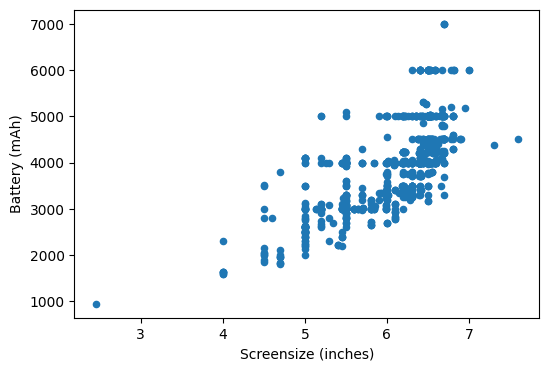

In [22]:
df.plot.scatter(x="Screensize (inches)", y="Battery (mAh)", figsize=(6,4))

<AxesSubplot:xlabel='Screensize (inches)', ylabel='Price'>

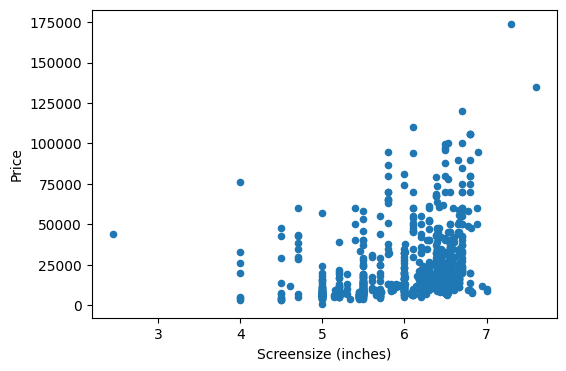

In [23]:
df.plot.scatter(x="Screensize (inches)", y="Price", figsize=(6,4))

### **SOAL 2: Data Visualization**

Untuk menjawab soal-soal berikut, pilihlah salah satu dari visualisasi di bawah ini yang merupakan visualisasi yang tepat untuk menjawab pertanyaan tersebut:
* Pie chart
* Bar chart
* Scatter plot
* Box plot
* Histogram
* KDE Plot

Pada beberapa kasus terkadang memiliki lebih dari satu "jawaban yang tepat", karena ada banyak cara untuk visualisasi data. Pilihlah yang menurut Anda paling cocok berdasarkan kasus yang diberikan pada soal tersebut.

**Harap tuliskan secara eksplisit chart apa yang Anda pilih beserta alasannya.**

(a) Buatlah visualisasi untuk melihat jumlah rata-rata ukuran Megapiksel dari kamera belakang yang dimiliki dari setiap merk *smartphone*. Apakah merek Sony memiliki ukuran Megapiksel dari kamera belakang terbesar?

In [24]:
# Jawab
df_copy = df.copy()
df_copy['Brand'].unique()

array(['Xiaomi', 'Vivo', 'Samsung', 'Realme', 'OnePlus', 'Poco', 'Apple',
       'Tecno', 'Infinix', 'Oneplus', 'vivo', 'Oppo', 'Redmi', 'POCO',
       'Moto', 'iQOO', 'LG', 'Asus', 'TECNO', 'OPPO', 'Sony', 'Nokia',
       'samsung', 'Google', 'REALME', 'Huawei', 'Honor', 'Motorola',
       'RealMe', 'IQOO', 'Micromax', 'Lenovo', 'Blackberry', 'BlackBerry',
       'Itel', 'Alcatel', 'Pocophone', 'Coolpad', 'Panasonic', 'Black',
       'Gionee', 'Intex', 'HTC', 'Lava', 'VIVO', 'Tenor', 'Karbonn',
       'Microsoft', 'Unihertz', '10.or', 'Razer', 'Infocus',
       'Caterpillar', 'InFocus', 'Nubia', 'Swipe', 'Lyf', 'Acer', 'Meizu',
       'Yu', 'Nextbit', 'i', 'Xolo', 'Blu', 'Mi', 'Hauwei', 'Jivi',
       'Homtom', 'iQoo', 'Mobiistar'], dtype=object)

In [25]:
# Additional data cleaning for handling inconsistency data
for idx, row in df_copy.iterrows():
    if row['Brand'] == "vivo":
        df_copy['Brand'].replace("vivo", "Vivo", inplace=True)
    elif row['Brand'] == "VIVO":
        df_copy['Brand'].replace("VIVO", "Vivo", inplace=True)
    elif row['Brand'] == "POCO":
        df_copy['Brand'].replace("POCO", "Poco", inplace=True)
    elif row['Brand'] == "OPPO":
        df_copy['Brand'].replace("OPPO", "Oppo", inplace=True)
    elif row['Brand'] == "samsung":
        df_copy['Brand'].replace("samsung", "Samsung", inplace=True)
    elif row['Brand'] == "RealMe":
        df_copy['Brand'].replace("RealMe", "Realme", inplace=True)
    elif row['Brand'] == "Blackberry":
        df_copy['Brand'].replace("Blackberry", "BlackBerry", inplace=True)
    elif row['Brand'] == "Hauwei":
        df_copy['Brand'].replace("Hauwei", "Huawei", inplace=True)
    elif row['Brand'] == "IQOO":
        df_copy['Brand'].replace("IQOO", "iQoo", inplace=True)
    elif row['Brand'] == "iQOO":
        df_copy['Brand'].replace("iQOO", "iQoo", inplace=True)
    elif row['Brand'] == "Infocus":
        df_copy['Brand'].replace("Infocus", "InFocus", inplace=True)
    elif row['Brand'] == "TECNO":
        df_copy['Brand'].replace("TECNO", "Tecno", inplace=True)
    elif row['Brand'] == "REALME":
        df_copy['Brand'].replace("REALME", "Realme", inplace=True)
    elif row['Brand'] == "Oneplus":
        df_copy['Brand'].replace("Oneplus", "OnePlus", inplace=True)

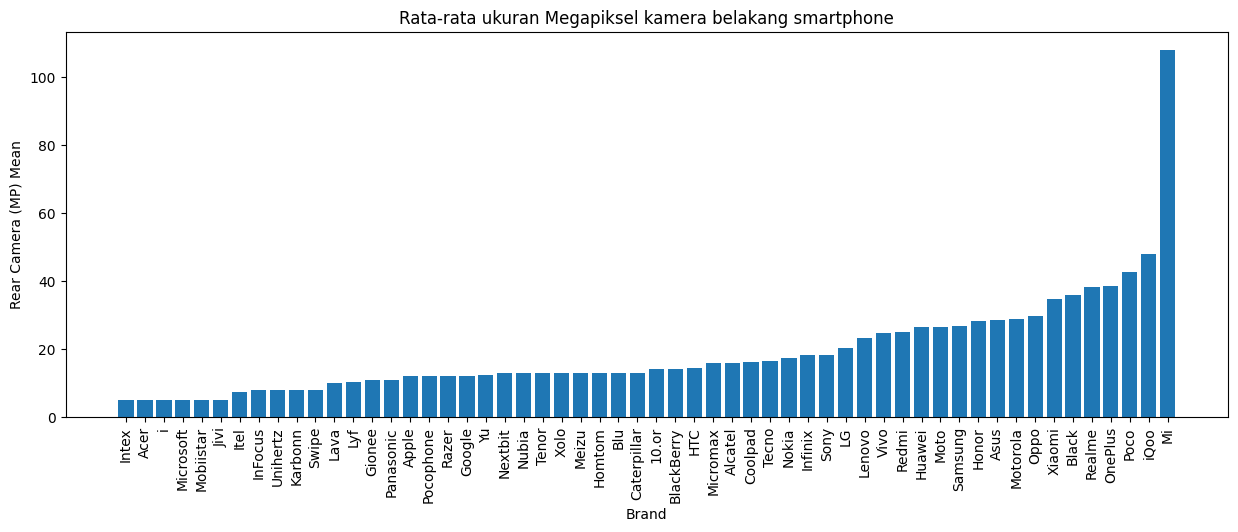

In [26]:
rearcam_range = df_copy.groupby('Brand')['Rear Camera (MP)'].mean().reset_index()
rearcam_range.sort_values(by='Rear Camera (MP)', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
plt.bar(rearcam_range['Brand'], rearcam_range['Rear Camera (MP)'])
plt.title("Rata-rata ukuran Megapiksel kamera belakang smartphone")
plt.xlabel("Brand")
plt.ylabel("Rear Camera (MP) Mean")
plt.xticks(rotation=90)
plt.show()

Saya memilih **bar chart** karena saya memerlukan visualisasi data rata-rata megapiksel kamera belakang setiap brand smartphone.

Berdasarkan bar chart di atas, merek Sony tidak memiliki **rata-rata** ukuran Megapiksel kamera belakang terbesar, melainkan smartphone merek Mi yang memiliki rata-rata ukuran Megapiksel kamera belakang terbesar.

(b) Buatlah visualisasi data persentase *smartphone* yang memiliki ukuran RAM yang lebih dari 6 GB. Dari hasil visualisasi tersebut berapakah persentase dari smartphone dengan nilai rating 3 dan memiliki RAM yang lebih dari 6 GB?

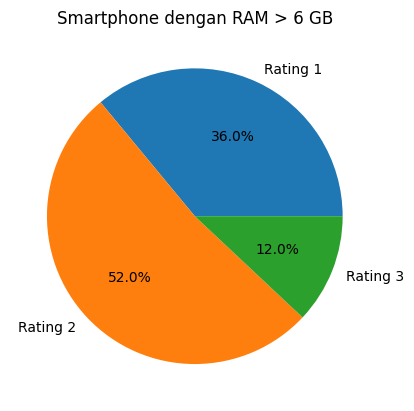

In [48]:
# Jawab
ram_df = df[df['RAM (GB)'] > 6][['Phone', 'RAM (GB)', 'Rating']]
rate_one = ram_df[ram_df['Rating'] == 1].shape[0]
rate_two = ram_df[ram_df['Rating'] == 2].shape[0]
rate_three = ram_df[ram_df['Rating'] == 3].shape[0]

sizes = np.array([rate_one, rate_two, rate_three])
labels = ["Rating 1", "Rating 2", "Rating 3"]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Smartphone dengan RAM > 6 GB")
plt.show()

Saya menggunakan **pie chart** agar proporsi pembagian dua variabel menjadi lebih mudah dipahami.

Hasil visualisasi menunjukkan bahwa dari seluruh smartphone yang memiliki RAM lebih dari 6 GB, terdapat 12% yang mendapatkan rating 3, dan 88% yang mendapatkan rating lebih atau kurang dari 3.

(c) Buatlah visualisasi untuk melihat apakah terdapat outliers di atribut `Camera_Nos` untuk setiap besaran RAM. Berikan satu contoh RAM yang terlihat memiliki outlier dan berikan alasannya!

<AxesSubplot:xlabel='RAM (GB)', ylabel='Camera_Nos'>

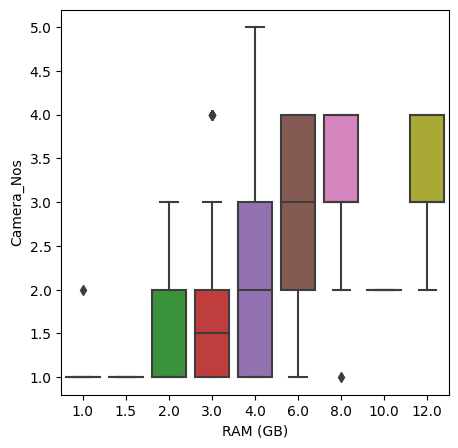

In [28]:
# Jawab
plt.figure(figsize=(5,5))
plt.xticks(size=10)
plt.yticks(size=10)
sns.boxplot(data=df, x='RAM (GB)', y='Camera_Nos')

Saya menggunakan **box plot** agar nilai lower bound dan upper bound tergambarkan dengan jelas sehingga mudah untuk mengamati outlier.

Contoh `RAM (GB)` yang memiliki outlier adalah RAM 3 GB. Hal ini karena terdapat nilai pada RAM  3 GB yang melebihi upper bound limit.

(d) Buatlah visualisasi untuk melihat pola atau pattern antara Battery (mAh) dan Screensize (inches). **Menurut Anda, apa hubungan yang dimiliki antara Battery dan Screensize ? Jelaskan!**

<AxesSubplot:xlabel='Battery (mAh)', ylabel='Screensize (inches)'>

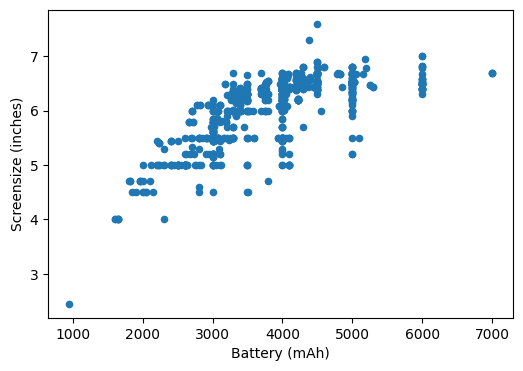

In [29]:
# Jawab
df.plot.scatter(x="Battery (mAh)", y="Screensize (inches)", figsize=(6,4))

Saya menggunakan **scatter plot** untuk menggambarkan distribusi hubungan dua variable.

Berdasarkan scatter plot di atas, hubungan `Battery (mAh)` dan `Screensize (inches)` adalah berbanding lurus naik. Semakin besar Battery (mAh), maka semakin besar pula nilai Screensize (inches).

(e) Visualisasikan distribusi data `Memory (GB)` pada Samsung dan Infinix. **Berikan analisis Anda!**

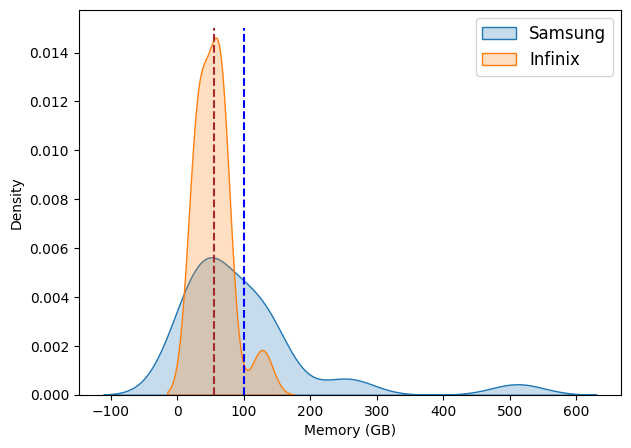

In [30]:
# Jawab
samsung = df_copy[df_copy['Brand'] == "Samsung"]
infinix = df_copy[df_copy['Brand'] == "Infinix"]
plt.figure(figsize=(7,5))
sns.kdeplot(samsung['Memory (GB)'], fill=True)
sns.kdeplot(infinix['Memory (GB)'], fill=True)
plt.legend(['Samsung','Infinix'], fontsize=12)
plt.vlines(x=samsung['Memory (GB)'].mean(), ymin=0, ymax=0.015, color='blue', linestyle='--')
plt.vlines(x=infinix['Memory (GB)'].mean(), ymin=0, ymax=0.015, color='brown', linestyle='--')
plt.show()

Saya menggunakan **overlapping KDE plot** untuk membandingkan distribusi data antara dua variabel.

Berdasarkan gambar di atas, Memory (GB) Samsung lebih kecil daripada Infinix. Hal tersebut memengaruhi ke nilai rata-rata Memory (GB) Infinix lebih dari dua kali lipat Samsung.

(f) Buatlah visualisasi untuk menentukan merek *smartphone* yang memiliki kapasitas penyimpanan kurang dari 64 GB dan memiliki rating 1 dengan harga rata-rata terendah (paling murah). Apa yang membuat produk pada merek *smartphone* tersebut memiliki harga termurah? `hint: Gunakan Descriptive Statistics`

In [32]:
# Jawab
low_memory = df_copy[df_copy['Memory (GB)'] < 64]
low_rating = low_memory[low_memory['Rating'] == 1]
low_price = low_rating.groupby('Brand')['Price'].mean().sort_values(ascending=True)
low_price.head(1)

Brand
Acer    905.0
Name: Price, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

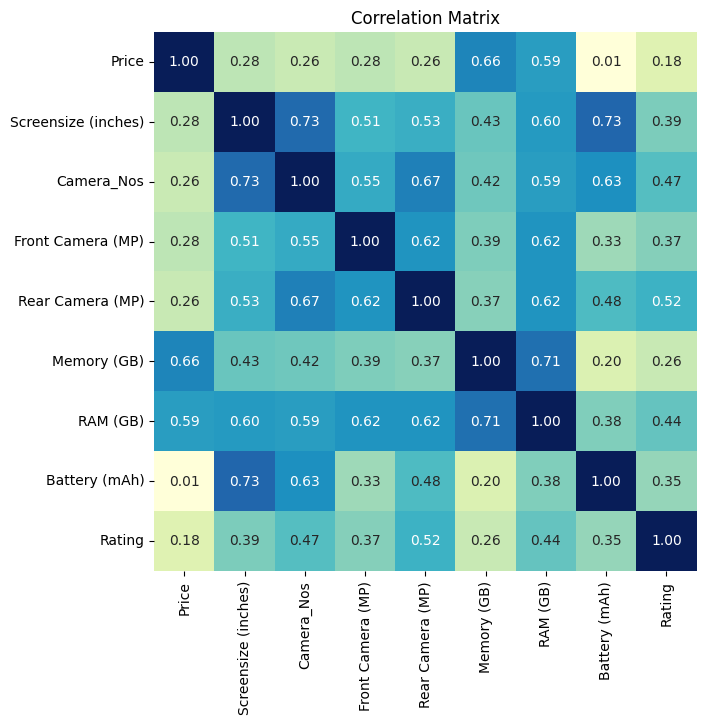

In [33]:
plt.figure(figsize=(7,7))
sns.heatmap(df.select_dtypes(np.number).corr(method="pearson"), 
        annot=True,
        cbar=False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=df.select_dtypes(np.number).columns,
        yticklabels=df.select_dtypes(np.number).columns)
plt.title("Correlation Matrix")

In [42]:
acer_df = df_copy[df_copy['Brand'] == 'Acer'].reset_index()
acer_df.describe()

,index,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,746.0,905.0,5.0,1.0,2.0,5.0,8.0,1.0,2000.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,746.0,905.0,5.0,1.0,2.0,5.0,8.0,1.0,2000.0,1.0
25%,746.0,905.0,5.0,1.0,2.0,5.0,8.0,1.0,2000.0,1.0
50%,746.0,905.0,5.0,1.0,2.0,5.0,8.0,1.0,2000.0,1.0
75%,746.0,905.0,5.0,1.0,2.0,5.0,8.0,1.0,2000.0,1.0
max,746.0,905.0,5.0,1.0,2.0,5.0,8.0,1.0,2000.0,1.0


In [43]:
acer_df.head()

,index,Brand,Phone,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
0,746,Acer,Acer Liquid Z6E,905,5.0,1,2.0,5.0,8.0,1.0,2000.0,1


Berdasarkan heatmap correlation matrix dan data spesifikasi smartphone Acer, dapat disimpulkan beberapa hal di bawah:
* Aspek `Price` berkorelasi kuat dan positif dengan `Memory (GB)`, namun pada smartphone merek Acer rata-rata Memory(GB) yang dimiliki sangat kecil, hanya 8 GB, sehingga harga smartphone-nya juga rendah.
* Aspek `Price` berkorelasi moderate dan positif dengan `RAM (GB)`, namun ternyata rata-rata RAM smartphone Acer cukup kecil dibandingkan merek smartphone lainnya.
* Acer juga lemah di aspek-aspek lainnya, seperti `Screensize (inches)`, `Camera_Nos`, `Front Camera (MP)`. Meskipun nilai korelasi aspek-aspek tersebut dengan harga smartphone tergolong lemah, namun aspek tersebut juga berkorelasi positif pada rata-rata harga smartphone Acer.